## Домашнее задание

In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Normal
Для датасета Boston сделать лучшую линейную модель, которую можно легко интерпретировать. Сделать выводы о данных на основе вашей линейной регрессии.

In [74]:
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [122]:
x_df = pd.DataFrame(data['data'], columns=data['feature_names'])
x_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### Аттрибуты:
        - CRIM     уровень преступности по городам на душу населения
        - ZN       доля земли под жилую застройку, зонированной под участки площадью более 25 000 кв.м.
        - INDUS    доля акров неторгового бизнеса на город
        - CHAS     Charles River фиктивная переменная (= 1, если участок граничит с рекой; 0 в противном случае)
        - NOX      концентрация оксида азота (частей на 10 миллионов)
        - RM       среднее количество комнат в жилом помещении
        - AGE      доля занимаемых владельцами квартир, построенных до 1940 года.
        - DIS      взвешенные расстояния до пяти центров занятости Бостона
        - RAD      индекс доступности к радиальным магистралям
        - TAX      полная ставка налога на имущество за 10 000 долларов США
        - PTRATIO  соотношение учеников/учителей по городам
        - B        1000(Bk - 0.63)^2, где Bk - доля чернокожих по городам.
        - LSTAT    более низкий статус населения
        - MEDV     средняя стоимость домов, занимаемых владельцами, в тысячах долларов США

In [120]:
y_df = pd.DataFrame(data['target'], columns=['y'])
y_df.head()

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [159]:
df_corr = x_df.corr()
df_corr[(np.abs(df_corr) > 0.8)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN


In [160]:
x_dff = x_df.drop(columns=['TAX'])

In [161]:
x_dfff = x_dff.drop(columns=['ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'CRIM'])
x_dfff

,NOX,RM,PTRATIO,LSTAT
0,0.538,6.575,15.3,4.98
1,0.469,6.421,17.8,9.14
2,0.469,7.185,17.8,4.03
3,0.458,6.998,18.7,2.94
4,0.458,7.147,18.7,5.33
...,...,...,...,...
501,0.573,6.593,21.0,9.67
502,0.573,6.120,21.0,9.08
503,0.573,6.976,21.0,5.64
504,0.573,6.794,21.0,6.48


In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_dfff, y_df, train_size=0.8)
x_train.shape, x_test.shape

((404, 4), (102, 4))

In [163]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [164]:
y_pred = model.predict(x_test)
mean_squared_error(y_pred, y_test)

20.868305473157662

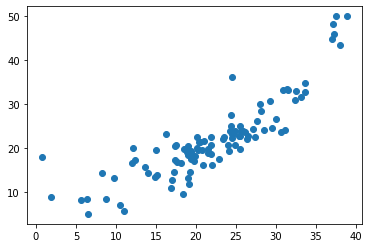

In [165]:
plt.scatter(y_pred, y_test)

In [166]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.6620765926681416
intercept: [20.04777748]
coefficients: [[-0.92043658  4.20083587 -0.84734659 -0.6126784 ]]


#### Выводы на основании модели

Модель
Y = 20 - 0.92 * NOX + 4.2 * RM - 0.85 * PTRATIO - 0.61 * LSTAT

По полученной линейной модели стоимость жилья рассчитывается исходя из четырех параметров (концентрация оксида азота, среднее количество комнат в жилом помещении, коэффициент отношения учеников к учителям, более низкий статус населения). Модель демонстрирует прямую зависимость стоимости жилья от числа комнат в жилом помещении (коэффициент 4.2) и обратную зависимость от остальных факторов.

## Hard
Чтобы окончательно разобраться с линейной регрессией, лучше всего один раз реализовать ее самостоятельно. В этом и состоит суть задания.

В качестве данных использовать датасет https://www.kaggle.com/mustafaali96/weight-height. Единицы измерения - дюймы и фунты.

Будем исследовать как рост зависит от веса для мужчин.

Алгоритм решения задачи:

Написать функцию для подсчета прогноза линейной регрессии , в которой w и b - веса модели, которые мы будем оптимизировать, а x - входные данные (зависимая переменная). Обращаю внимание, что функция должна быть векторизована, то есть в x должна быть возможность передать вектор значений, а не одно число.

Написать функцию ошибки для модели . ,  - параметры модели, а  - вектор входящих данных. В качестве ошибки будем использовать Mean Squared Error (MSE).

Минимизировать функцию J по параметрам  и , используя данные . Минимизацию можно проводить при помощи функции minimize.

Подставить получившиеся минимальные значения w и b в функцию f, нарисовать диаграмму рассеивания (scatter plot) и отобразить работу модели (пример графика есть в этом ноутбуке)

In [64]:
raw_df = pd.read_csv("D:\Курсы Питон\weight-height.csv")
df = raw_df[raw_df["Gender"] == "Male"]
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
x_df = np.array(df["Weight"]).reshape((-1, 1))
x_df

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [199.19540008],
       [185.90590949],
       [198.90301194]])

In [8]:
y_df = np.array(df["Height"])
y_df

array([73.84701702, 68.78190405, 74.11010539, ..., 67.01379497,
       71.55771849, 70.35187988])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)
x_train.shape, x_test.shape

((4000, 1), (1000, 1))

## Встроенной функцией

In [11]:
model = LinearRegression().fit(x_train, y_train)

In [12]:
model.intercept_

45.648655305561505

In [13]:
model.coef_

array([0.12490367])

In [14]:
model.score(x_train, y_train)

0.7416223867388276

In [15]:
y_pred = model.predict(x_test)
mean_squared_error(y_pred, y_test)

2.0930746983145307

## Через уравнения

In [65]:
N = len(x_train)
sum_x = x_train.sum()
sum_y = y_train.sum()
sum_sqr_x = (x_train**2).sum()
sum_sqr_y = (y_train**2).sum()
sum_xy = (x_train.reshape(-1) * y_train).sum()
N, sum_x, sum_y, sum_sqr_x, sum_sqr_y, sum_xy

(4000,
 748390.5741465411,
 276071.3469830085,
 141562228.1983575,
 19086245.348528918,
 51844664.518217385)

In [66]:
import scipy.optimize as optimize
def J(params):
    w, b = params
    return 0.5*sum_sqr_y - w*sum_xy - b*sum_y + 0.5*w**2*sum_sqr_x + w*b*sum_x + 0.5*N*b**2

initial_guess = [10, 10]
result = optimize.minimize(J, initial_guess)
result

      fun: 4185.483797646128
 hess_inv: array([[7.41070853e-09, 4.99645720e-10],
       [4.99645720e-10, 4.91572554e-08]])
      jac: array([0.125  , 0.09375])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 285
      nit: 17
     njev: 91
   status: 2
  success: False
        x: array([ 0.12490282, 45.64881465])

In [67]:
def y_predict(x):
    return 0.12490282*x + 45.64881465

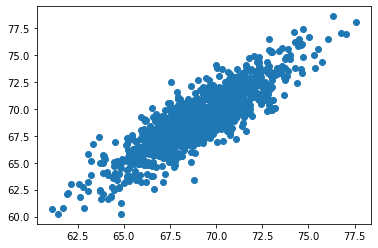

In [68]:
plt.scatter(y_predict(x_test).reshape(-1), y_test)

In [69]:
mean_squared_error(y_predict(x_test), y_test)

2.093074516938075